Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.77      0.68      0.72        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



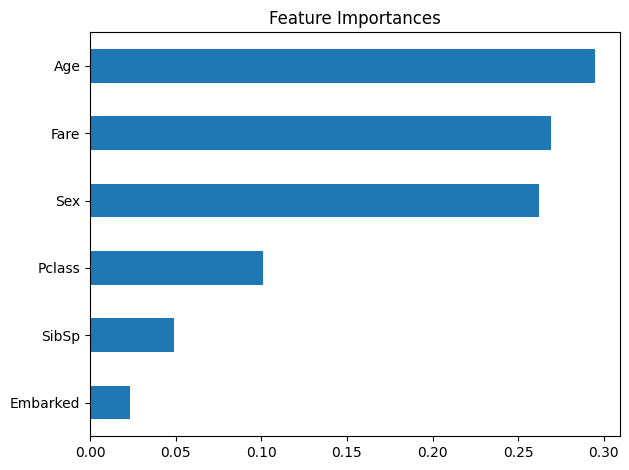

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']]
df.dropna(inplace=True)

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [3]:
import joblib
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']